In [304]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge

In [305]:
baseDeDonnees =  pd.read_csv("Donnés\BaseDeDonneesPlusComplete2014-2025.csv", index_col = "date")
del baseDeDonnees["sunset_hhmm"]
del baseDeDonnees["sunrise_hhmm"]
baseDeDonnees


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,
2025-02-19,-10.2,-13.85,-14.00,-17.8,NaN,-27.0,77,64.6,65.5,54,...,NaN,NaN,8,2.5,4.5,1,NaN,NaN,NaN,NaN
2025-02-18,-12.7,-14.02,-14.00,-15.3,NaN,-27.0,76,63.6,66.5,57,...,NaN,NaN,8,7.3,6.5,5,NaN,NaN,NaN,NaN
2025-02-17,-9.5,-11.97,-11.95,-14.4,NaN,-27.0,85,69.3,73.0,61,...,NaN,NaN,8,6.2,5.5,3,NaN,NaN,NaN,NaN
2025-02-16,-9.1,-10.07,-9.89,-10.7,NaN,-22.0,87,84.1,82.0,77,...,NaN,NaN,8,7.4,6.0,4,NaN,NaN,NaN,NaN
2025-02-15,-8.1,-10.77,-11.39,-14.7,NaN,-20.0,83,65.3,65.0,47,...,NaN,NaN,8,7.9,7.0,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-20,-6.4,-13.44,-13.55,-20.7,NaN,-32.0,81,58.1,64.5,48,...,NaN,NaN,8,5.8,4.5,1,NaN,NaN,NaN,NaN
2014-01-19,-2.2,-3.72,-4.30,-6.4,NaN,-13.0,93,84.0,78.5,64,...,NaN,NaN,8,7.8,6.0,4,NaN,NaN,NaN,NaN
2014-01-18,2.4,-1.70,-2.29,-7.0,NaN,-9.0,94,81.8,79.5,65,...,NaN,NaN,8,4.9,4.5,1,NaN,NaN,NaN,NaN


In [306]:
#Verifier quel donné sont trop peu.
null_prc = baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]
null_prc


max_temperature              0.000000
avg_hourly_temperature       0.000000
avg_temperature              0.000000
min_temperature              0.000000
max_humidex                  0.719467
                               ...   
min_cloud_cover_8            0.000000
max_cloud_cover_10           1.000000
avg_hourly_cloud_cover_10    1.000000
avg_cloud_cover_10           1.000000
min_cloud_cover_10           1.000000
Length: 69, dtype: float64

In [307]:
colonne_valide = baseDeDonnees.columns[null_prc < 0.05]
colonne_valide.shape[0]

49

In [308]:
baseDeDonnees = baseDeDonnees[colonne_valide].copy()
baseDeDonnees.dtypes

max_temperature                  float64
avg_hourly_temperature           float64
avg_temperature                  float64
min_temperature                  float64
max_relative_humidity              int64
avg_hourly_relative_humidity     float64
avg_relative_humidity            float64
min_relative_humidity              int64
max_dew_point                    float64
avg_hourly_dew_point             float64
avg_dew_point                    float64
min_dew_point                    float64
max_wind_speed                     int64
avg_hourly_wind_speed            float64
avg_wind_speed                   float64
min_wind_speed                     int64
max_pressure_sea                 float64
avg_hourly_pressure_sea          float64
avg_pressure_sea                 float64
min_pressure_sea                 float64
max_pressure_station             float64
avg_hourly_pressure_station      float64
avg_pressure_station             float64
min_pressure_station             float64
max_visibility  

In [309]:
baseDeDonnees.columns = baseDeDonnees.columns.str.lower()
#Remplir les trous dans la base de donné par avec la valeurs avant.
baseDeDonnees = baseDeDonnees.ffill()
#Verification qu'il ne manque plus de manque de donnés.
null_prc = baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]
null_prc



max_temperature                  0.0
avg_hourly_temperature           0.0
avg_temperature                  0.0
min_temperature                  0.0
max_relative_humidity            0.0
avg_hourly_relative_humidity     0.0
avg_relative_humidity            0.0
min_relative_humidity            0.0
max_dew_point                    0.0
avg_hourly_dew_point             0.0
avg_dew_point                    0.0
min_dew_point                    0.0
max_wind_speed                   0.0
avg_hourly_wind_speed            0.0
avg_wind_speed                   0.0
min_wind_speed                   0.0
max_pressure_sea                 0.0
avg_hourly_pressure_sea          0.0
avg_pressure_sea                 0.0
min_pressure_sea                 0.0
max_pressure_station             0.0
avg_hourly_pressure_station      0.0
avg_pressure_station             0.0
min_pressure_station             0.0
max_visibility                   0.0
avg_hourly_visibility            0.0
avg_visibility                   0.0
m

In [310]:
#Rendre en minuscule les titres
baseDeDonnees.columns = baseDeDonnees.columns.str.lower()

<Axes: xlabel='date'>

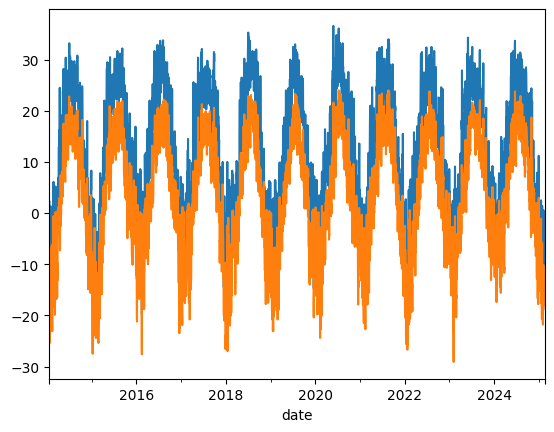

In [311]:
baseDeDonnees.index = pd.to_datetime(baseDeDonnees.index)
baseDeDonnees.index.year.value_counts().sort_index()
baseDeDonnees["max_temperature"].plot()
baseDeDonnees["min_temperature"].plot()


In [312]:
#Inverser les dates.
baseDeDonnees = baseDeDonnees.iloc[::-1]
#Choix de se qu'on veut produire.(Ici temperature maximum)
baseDeDonnees["target"] = baseDeDonnees.shift(-1)["max_temperature"]
baseDeDonnees
baseDeDonnees.ffill()


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,daylight,min_high_temperature_forecast,max_high_temperature_forecast,min_low_temperature_forecast,max_low_temperature_forecast,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,target
date,,,,,,,,,,,,,,,,,,,,,
2014-01-16,-0.5,-1.79,-2.80,-5.1,83,69.2,67.0,51,-4.9,-6.9,...,9.12,-2,-1,-8,-7,8,5.8,5.0,2,0.6
2014-01-17,0.6,-2.00,-2.30,-5.2,90,83.3,84.5,79,-2.4,-4.5,...,9.17,0,0,-7,-7,8,7.2,6.0,4,2.4
2014-01-18,2.4,-1.70,-2.29,-7.0,94,81.8,79.5,65,-2.9,-4.5,...,9.20,-1,-1,-3,-3,8,4.9,4.5,1,-2.2
2014-01-19,-2.2,-3.72,-4.30,-6.4,93,84.0,78.5,64,-3.6,-6.1,...,9.22,-4,-4,-12,-12,8,7.8,6.0,4,-6.4
2014-01-20,-6.4,-13.44,-13.55,-20.7,81,58.1,64.5,48,-13.6,-20.2,...,9.27,-13,-13,-23,-12,8,5.8,4.5,1,-19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-15,-8.1,-10.77,-11.39,-14.7,83,65.3,65.0,47,-12.7,-16.3,...,10.40,-9,-9,-11,-11,8,7.9,7.0,6,-9.1
2025-02-16,-9.1,-10.07,-9.89,-10.7,87,84.1,82.0,77,-11.4,-12.3,...,10.47,-10,-10,-12,-12,8,7.4,6.0,4,-9.5
2025-02-17,-9.5,-11.97,-11.95,-14.4,85,69.3,73.0,61,-12.3,-16.6,...,10.52,-10,-10,-14,-12,8,6.2,5.5,3,-12.7


In [313]:
#Configuration du model
model_rr = Ridge(alpha=.1)
predicteur = baseDeDonnees.columns[~baseDeDonnees.columns.isin(["target","date"])]
predicteur

Index(['max_temperature', 'avg_hourly_temperature', 'avg_temperature',
       'min_temperature', 'max_relative_humidity',
       'avg_hourly_relative_humidity', 'avg_relative_humidity',
       'min_relative_humidity', 'max_dew_point', 'avg_hourly_dew_point',
       'avg_dew_point', 'min_dew_point', 'max_wind_speed',
       'avg_hourly_wind_speed', 'avg_wind_speed', 'min_wind_speed',
       'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea',
       'min_pressure_sea', 'max_pressure_station',
       'avg_hourly_pressure_station', 'avg_pressure_station',
       'min_pressure_station', 'max_visibility', 'avg_hourly_visibility',
       'avg_visibility', 'min_visibility', 'heatdegdays', 'cooldegdays',
       'growdegdays_5', 'growdegdays_7', 'growdegdays_10', 'precipitation',
       'rain', 'snow', 'sunrise_unixtime', 'sunrise_f', 'sunset_unixtime',
       'sunset_f', 'daylight', 'min_high_temperature_forecast',
       'max_high_temperature_forecast', 'min_low_temperature_fore

In [314]:
def backtest(baseDeDonnees,model,predicteur,start =720 ,step=90):
    all_predictions = []
    for i in range(start,baseDeDonnees.shape[0],step):
        train = baseDeDonnees.iloc[:i,:]
        test = baseDeDonnees.iloc[i:i+step,:]

        model.fit(train[predicteur],train["target"])
        preds = model.predict(test[predicteur])
        preds = pd.Series(preds,index =test.index)
        combined = pd.concat([test["target"],preds],axis=1)
        combined.columns = ["Vrais valeur","Valeur predite"]
        combined["difference"] = (combined["Valeur predite"] - combined["Vrais valeur"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [315]:
predictions = backtest(baseDeDonnees,model_rr,predicteur)
predictions

C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.61407e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.13361e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.26504e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.21114e-20): result may not be accurate.
  return linalg.solve

,Vrais valeur,Valeur predite,difference
date,,,
2016-01-06,-0.4,-1.344689,0.944689
2016-01-07,2.7,-0.679143,3.379143
2016-01-08,4.3,4.206487,0.093513
2016-01-09,7.7,6.388083,1.311917
2016-01-10,-0.9,-0.735006,0.164994
...,...,...,...
2025-02-15,-9.1,-4.320493,4.779507
2025-02-16,-9.5,-8.856927,0.643073
2025-02-17,-12.7,-8.722877,3.977123
